# KNearest Neighbors

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(iris.data,iris.target)
a=knn.predict([[4,6,8,10],])
print(a)
print(iris.target_names[a])

[2]
['virginica']


In [7]:
data=pd.read_csv('heart_cleveland_upload.csv')
data.rename(columns={'condition':'target'},inplace=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [8]:
y=data["target"].values
X=data.drop(["target"],axis=1)
# nomalize the data
X=(X-np.min(X))/(np.max(X)-np.min(X)).values


C:\Users\ADITYA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ADITYA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [9]:
# split the data
# preparing of data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=0)
# Logistic regression instance is created 
logreg=LogisticRegression()
# training of model
logreg.fit(X_train,y_train) 
print("Test accuracy of Logistic regression : {}".format(logreg.score(X_test,
                                                                     y_test)))


Test accuracy of Logistic regression : 0.8333333333333334


In [10]:
# KNN accuracy on the same dataset
knn=KNeighborsClassifier(n_neighbors=3)
knn1=KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
knn1.fit(X_train,y_train)
print("Test accuracy of KNeighbour Classifier at n_neighbour 3 : {}".format(knn.score(X_test,
                                                                     y_test)))
print("Test accuracy of KNeighbour Classifier at n_neighbour 6 : {}".format(knn1.score(X_test,
                                                                     y_test)))


Test accuracy of KNeighbour Classifier at n_neighbour 3 : 0.8166666666666667
Test accuracy of KNeighbour Classifier at n_neighbour 6 : 0.8666666666666667


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,20)}
knn=KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
# finds the best value of n_neighbour for the model
knn_cv.best_params_

{'n_neighbors': 12}

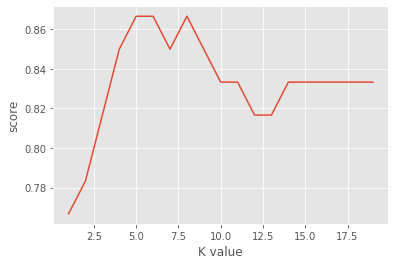

In [12]:
# another way of finding the best value of n_neighbors
scorelist=[]
for i in range(1,20):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    prediction=knn.predict(X_test)
    scorelist.append(knn.score(X_test,y_test))
    
plt.plot(range(1,20),scorelist)
plt.xlabel("K value")
plt.ylabel("score")
plt.show()

In [13]:
max(scorelist)

0.8666666666666667

# working with support vector Machine ALgorithm

In [14]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
print("Test accuracy of svm: {}".format(svm.score(X_test,y_test)))



Test accuracy of svm: 0.85


In [15]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
print("Test accuracy of Naive Bayes: {}".format(nb.score(X_test,y_test)))


Test accuracy of Naive Bayes: 0.8333333333333334


In [17]:
# working with decision tree algorithms
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print("Test accuracy of Decision Tree Classifier : {}".format(dtc.score(X_test,y_test)))

Test accuracy of Decision Tree Classifier : 0.6833333333333333


In [22]:
# working with random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,random_state=1)
rf.fit(X_train,y_train)
print("Test accuracy of Random Forest Classifier : {}".format(rf.score(X_test,y_test)))

Test accuracy of Random Forest Classifier : 0.75


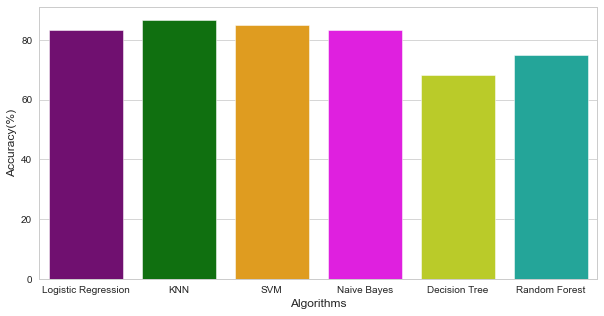

In [26]:
import seaborn as sns
methods=["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree","Random Forest"]
accuracy = [83.33,86.66,85.0,83.33,68.33,75.0]
colors=["purple",'green','orange','magenta','#CFE60E','#0EBBAB']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy(%)")
sns.barplot(x=methods,y=accuracy,palette=colors)
plt.show()

# Unsupervised Learning

# K-means clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans
data=pd.read_csv("xclara.csv")
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


C:\Users\ADITYA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


[0 0 0 2 2]


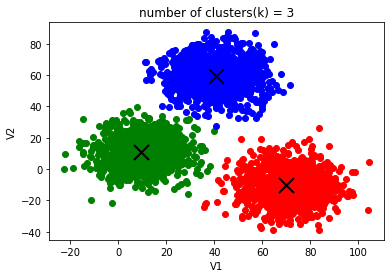

In [4]:
k=3  # number of clusters
kmean=KMeans(n_clusters=k)
# train the model
kmean=kmean.fit(data)
labels=kmean.labels_  #  array that contains cluster numbers
centroids=kmean.cluster_centers_
# testing data
x_test=[[49.6,67],[27.88,60],[94.65,48],[-1.33,5.6],[14.555,-1.22]]
prediction =kmean.predict(x_test)
print(prediction)

colors=["blue","red","green","black"]
y=0
for x in labels:
    plt.scatter(data.iloc[y,0],data.iloc[y,1],color=colors[x])
    y+=1
for x in range(k):
    lines=plt.plot(centroids[x,0],centroids[x,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    
title=("number of clusters(k) = {}".format(k))
plt.title(title)
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

# Association


# Apriori Algorithm

In [23]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd
dataset = [["Milk","Onion","Nutmeg","Kidney Beans","Eggs","Yogurt"],
          ["Dill","Onion","Nugmeg","Kidney Beans","Eggs","Yougurt"],
          ["Milk","Apple","Kidney Beans","Eggs"],
          ["Milk","Unicorn","Corn","Kidney Beans","Yogurt"],
          ["Corn","Onion","Onion","Kidney Beans","Ice cream","Eggs"]]
te=TransactionEncoder()
Trans_array=te.fit(dataset).transform(dataset)
df=pd.DataFrame(Trans_array,columns=te.columns_)
print(df)
ap=apriori(df,min_support=0.6,use_colnames=True)
#print(ap)
ap["Length"]=ap['itemsets'].apply(lambda x : len(x))
print(ap)
print(ap[(ap["Length"]==3) & (ap["support"]>=0.6)])


   Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nugmeg  Nutmeg  \
0  False  False  False   True      False          True   True   False    True   
1  False  False   True   True      False          True  False    True   False   
2   True  False  False   True      False          True   True   False   False   
3  False   True  False  False      False          True   True   False   False   
4  False   True  False   True       True          True  False   False   False   

   Onion  Unicorn  Yogurt  Yougurt  
0   True    False    True    False  
1   True    False   False     True  
2  False    False   False    False  
3  False     True    True    False  
4   True    False   False    False  
   support                     itemsets  Length
0      0.8                       (Eggs)       1
1      1.0               (Kidney Beans)       1
2      0.6                       (Milk)       1
3      0.6                      (Onion)       1
4      0.8         (Kidney Beans, Eggs)       2
5  

In [27]:
import datetime as dt
print(dt.date.today().year)

2022


In [33]:
lst=[[5, 35044.51], [25, 29016.41], [50, 27405.93], [100, 27282.51], [250, 27893.82], [500, 29454.19]]

In [35]:
print(max(lst[0]))

35044.51
